<h1>Program Setup </h1>

In [2]:
# Libraries
import pytesseract                      # Optical Character Recognition
import PIL.Image                        # Image Accessing
import cv2                              # Image Modification
import os                               # Directory handling

from matplotlib import pyplot as plt    # Graphs


In [3]:
# Tesseract Setup
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\Elena.Justo\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'

<h2>Page Segmentation Modes</h2>

<ul>
    <li> O Orientation and script detection (OSD) only
    <li> 1 Automatic page segmentation with OSD. ‘
    <li> 2 Automatic page segmentation, but no OSD, or OCR.
    <li> 3 Fully automatic page segmentation, but no OSD. (Default)
    <li> 4 Assume a single column of text of variable sizes.
    <li> 5 Assume a single uniform block of vertically aligned text.
    <li> 6 Assume a single uniform block of textJ
    <li> 7 Treat the image as a single text line.
    <li> 8 Treat the image as a single word.
    <li> 9 Treat the image as a single word in a circle.
    <li> 10 Treat the image as a single character.
    <li> 11 Sparse text. Find as much text as possible in no particular order.
    <li> 12 Sparse text with OSD.
    <li> 13 Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract—specific.
</ul>

<h2> OCR Engine Modes</h2>
<ul>
    <li> 0 Legacy engine only
    <li> 1 Neural nets LSTM engine only
    <li> 2 Legacy + LSTM engines
    <li> 3 Default, based on what is available
</ul>

In [4]:
# Tesseract Configuration

pageSegMode = 4
ocrEngineMode = 3

config = r"--psm " + str(pageSegMode) + " --oem " + str(ocrEngineMode)

print(config)

--psm 4 --oem 3


<h1>Quick Demo</h1>

In [5]:
# Small Sample of Images

# Lisbona Nameplate
imgLisbona = PIL.Image.open(r"image_100\0VCB198801.JPG")

# Lipsia Nameplate
imgLipsia = PIL.Image.open(r"image_100\0VCF360901.jpg")

# Hussmann Nameplate Small
imgHuss1 = PIL.Image.open(r"image_100\030636.JPG")

# Hussmann Nameplate Large
imgHuss2 = PIL.Image.open(r"image_100\SZ35766.jpg")


In [6]:
# Tesseract Reading Test - Manual
textLisbona = pytesseract.image_to_string(imgLisbona, config=config)
textLipsia = pytesseract.image_to_string(imgLipsia, config=config)
textHuss1 = pytesseract.image_to_string(imgHuss1, config=config)
textHuss2 = pytesseract.image_to_string(imgHuss2, config=config)

print("#### Lisbona Nameplate: ####")
print(textLisbona)

print("#### Lipsia Nameplate: ####")
print(textLipsia)

print("#### Hussmann Nameplate Large: ####")
print(textHuss1)

print("#### Hussmann Nameplate Small: ####")
print(textHuss2)


#### Lisbona Nameplate: ####
USBONA 2CLFW 95205 250823050
c= 964137

seessmecons | {AMIN MUL VOUT QTL TTL APNE PNB APNE 0 EE 0
' - OVCB198801

#### Lipsia Nameplate: ####
I7SS 23050
ITEM IE2607; FOO

MATFHICOLA If MUTT CTT 7 a
on OVC, FIGOGD PA
SS OE ZL VOUS


#### Hussmann Nameplate Large: ####
MODEL No. KG20-5Z-4W20 H
SERIAL No: 030636

#### Hussmann Nameplate Small: ####
nuSsSSsSmAnr

MODEL: ALAS —-DIMENSIONS(L"W"HXMM):  2960x1126x2090
CLIMATE CLASS: 3 TYPE:RS16
NET VOLUME(L): 1980 NET WEI@HT(ka): 589
REFRIGERANT: = R22 DATE OF MANUFACTURE: 25/10/2022
VOLTAGE(V):220V-240V- FREQUENCY: 50
FANS CURRENT(A); 0.45 LIGHT CURRENT(A): 0.82

ANTLOWEAT CURRENT(A): 2.51
DEFROST AND DRAIN CURRENT(A): 12.48
CONFIG ID: RLASFZ-208T seniacno SZ35766

M NS WWMM

mann Retrigeration (Suzhou) Co. Ltd



<h1>Testing of Segmentation Modes</h1>

In [7]:
# Functions for automated test
def setConfiguration(pageSegMode, ocrEngineMode):
    return r"--psm " + str(pageSegMode) + " --oem " + str(ocrEngineMode)

def callTess(img, setConfig):
    return pytesseract.image_to_string(img, config=setConfig)

<h2>Lisbona Nameplate Test</h2>

In [8]:
# Lisbona Nameplate Test
imageTesting = imgLisbona
counterPageSeg = 1
while counterPageSeg < 13:
    print("####### Current Configuration: ", setConfiguration(counterPageSeg, 3) + " #######")
    try:
        print(callTess(imageTesting, setConfiguration(counterPageSeg, 3)))
    except:
        print("Error with config")
    counterPageSeg += 1

####### Current Configuration:  --psm 1 --oem 3 #######
USBONA 2CLFW 95205 250823050
=" 964137

seessmecons | {AMIN MUL VOUT QTL TTL APNE PNB APNE 0 EE 0
' - OVCB198801

####### Current Configuration:  --psm 2 --oem 3 #######
Error with config
####### Current Configuration:  --psm 3 --oem 3 #######
USBONA 2CLFW 95205 250823050
=" 964137

seessmecons | {AMIN MUL VOUT QTL TTL APNE PNB APNE 0 EE 0
' - OVCB198801

####### Current Configuration:  --psm 4 --oem 3 #######
USBONA 2CLFW 95205 250823050
c= 964137

seessmecons | {AMIN MUL VOUT QTL TTL APNE PNB APNE 0 EE 0
' - OVCB198801

####### Current Configuration:  --psm 5 --oem 3 #######
=
|B =
. =
Ne =o
1 io=®
f O=0
i
=
zr Eo
jj t=
g 025
gm
z 6
OW °
2 Of 4%
a Ae *,
—

####### Current Configuration:  --psm 6 --oem 3 #######
LISBONA 2CLFW 95205 250823050
== 96413706K

messes | AMIN MMA OUDTL YORE) UT PAD 0
\°“ ovcB198ss04

####### Current Configuration:  --psm 7 --oem 3 #######

####### Current Configuration:  --psm 8 --oem 3 #######
Se ema



<h3>Lisbona Test Results</h3>

<h4>All Segment Mode Results</h4>

<li> 1:   Automatic page segmentation with OSD. </li>
Good Result

<li> 2:   Automatic page segmentation, but no OSD, or OCR. </li>
Bad Result

<li> 3:   Fully automatic page segmentation, but no OSD. (Default) </li>
Good Result

<li> 4:   Assume a single column of text of variable sizes. </li>
Good Result

<li> 5:   Assume a single uniform block of vertically aligned text. </li>
Bad  Result

<li> 6:   Assume a single uniform block of text. </li>
Bad  Result

<li> 7:   Treat the image as a single text line. </li>
Bad Result

<li> 8:   Treat the image as a single word. </li>
Bad Result

<li> 9:   Treat the image as a single word in a circle. </li>
Bad Result

<li> 10:  Treat the image as a single character. </li>
Bad Result

<li> 11:  Sparse text. Find as much text as possible in no  particular order. </li>
Bad Result

<li> 12: Sparse text with OSD. </li>
Bad Result

<li> 13: Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract—specific. </li>
Bad Result

<h4>Good Segment Mode Results</h4>

<li> 1:   Automatic page segmentation with OSD. </li>
Good Result

<li> 3:   Fully automatic page segmentation, but no OSD. (Default) </li>
Good Result

<li> 4:   Assume a single column of text of variable sizes. </li>
Good Result

<h2>Lipsia Nameplate Test</h2>

In [9]:
# Lipsia Nameplate Test
imageTesting = imgLipsia
counterPageSeg = 1
while counterPageSeg < 13:
    print("####### Current Configuration: ", setConfiguration(counterPageSeg, 3) + " #######")
    try:
        print(callTess(imageTesting, setConfiguration(counterPageSeg, 3)))
    except:
        print("Error with config")
    counterPageSeg += 1

####### Current Configuration:  --psm 1 --oem 3 #######
SS2I050
ITEM IE2607; FOO

MATFHICOLA If MUTT CTT 7 a
on OVC, FIGOGD PA
SS OE ZL VOUS


####### Current Configuration:  --psm 2 --oem 3 #######
Error with config
####### Current Configuration:  --psm 3 --oem 3 #######
SS2I050
ITEM IE2607; FOO

MATFHICOLA If MUTT CTT 7 a
on OVC, FIGOGD PA
SS OE ZL VOUS


####### Current Configuration:  --psm 4 --oem 3 #######
I7SS 23050
ITEM IE2607; FOO

MATFHICOLA If MUTT CTT 7 a
on OVC, FIGOGD PA
SS OE ZL VOUS


####### Current Configuration:  --psm 5 --oem 3 #######
EN Ne
" 98d
¥ BSS
© KA &G&
y QS
NON
ONG
SQ
N S|
Qe §
J Gx g
J oge

####### Current Configuration:  --psm 6 --oem 3 #######
Cows. MN Map
LIPSIA 100/276 I75S. 23050
em I6260709
MATRICOLA LiL LLL
SN OVCF 360907
SS OE ZL VOUS

####### Current Configuration:  --psm 7 --oem 3 #######
| eee

####### Current Configuration:  --psm 8 --oem 3 #######
| eee

####### Current Configuration:  --psm 9 --oem 3 #######
cc faeces

####### Current Config

<h3>Lipsia Test Results</h3>

<h4>All Segment Mode Results</h4>

<li> 1:   Automatic page segmentation with OSD. </li>
Bad Result

<li> 2:   Automatic page segmentation, but no OSD, or OCR. </li>
Error

<li> 3:   Fully automatic page segmentation, but no OSD. (Default) </li>
Bad Result

<li> 4:   Assume a single column of text of variable sizes. </li>
Bad Result

<li> 5:   Assume a single uniform block of vertically aligned text. </li>
Bad Result

<li> 6:   Assume a single uniform block of text. </li>
Semi Good Result

<li> 7:   Treat the image as a single text line. </li>
Bad Result

<li> 8:   Treat the image as a single word. </li>
Bad Result

<li> 9:   Treat the image as a single word in a circle. </li>
Bad Result

<li> 10:  Treat the image as a single character. </li>
Bad Result

<li> 11:  Sparse text. Find as much text as possible in no  particular order. </li>
Bad Result

<li> 12: Sparse text with OSD. </li>
Bad Result

<li> 13: Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract—specific. </li>
Bad Result

<h4>Good Segment Mode Results</h4>
<li> 6:   Assume a single uniform block of text. </li>
Semi Good Result

<h2>Hussmann Small Nameplate Test</h2>

In [10]:
# Hussmann Small Nameplate Test
imageTesting = imgHuss1
counterPageSeg = 1
while counterPageSeg < 13:
    print("####### Current Configuration: ", setConfiguration(counterPageSeg, 3) + " #######")
    try:
        print(callTess(imageTesting, setConfiguration(counterPageSeg, 3)))
    except:
        print("Error with config")
    counterPageSeg += 1

####### Current Configuration:  --psm 1 --oem 3 #######
MODEL No. KG20-5Z-4W20 H
SERIAL No: 030636

####### Current Configuration:  --psm 2 --oem 3 #######
Error with config
####### Current Configuration:  --psm 3 --oem 3 #######
MODEL No. KG20-5Z-4W20 H
SERIAL No: 030636

####### Current Configuration:  --psm 4 --oem 3 #######
MODEL No. KG20-5Z-4W20 H
SERIAL No: 030636

####### Current Configuration:  --psm 5 --oem 3 #######
3
6
3
¢
no
ne
oo
an
Oo
¥
A224
3”

####### Current Configuration:  --psm 6 --oem 3 #######
MODEL No. KG20-5Z-4W20 H
SERIAL No: 030636

####### Current Configuration:  --psm 7 --oem 3 #######
oe ee

####### Current Configuration:  --psm 8 --oem 3 #######
“ene

####### Current Configuration:  --psm 9 --oem 3 #######
“ene

####### Current Configuration:  --psm 10 --oem 3 #######
oe ee

####### Current Configuration:  --psm 11 --oem 3 #######
MODEL No. KG20-5Z-4W20 H

SERIAL Not

Q30636

####### Current Configuration:  --psm 12 --oem 3 #######
MODEL No. KG20-5Z-4W20 H


<h3>Hussmann Small Test Results</h3>

<h4>All Segment Mode Results</h4>

<li> 1:   Automatic page segmentation with OSD. </li>
Good Result

<li> 2:   Automatic page segmentation, but no OSD, or OCR. </li>
Error

<li> 3:   Fully automatic page segmentation, but no OSD. (Default) </li>
Good Result

<li> 4:   Assume a single column of text of variable sizes. </li>
Good Result

<li> 5:   Assume a single uniform block of vertically aligned text. </li>
Bad Result

<li> 6:   Assume a single uniform block of text. </li>
Good Result

<li> 7:   Treat the image as a single text line. </li>
Bad Result

<li> 8:   Treat the image as a single word. </li>
Bad Result

<li> 9:   Treat the image as a single word in a circle. </li>
Bad Result

<li> 10:  Treat the image as a single character. </li>
Bad Result

<li> 11:  Sparse text. Find as much text as possible in no  particular order. </li>
Bad Result

<li> 12: Sparse text with OSD. </li>
Bad Result

<li> 13: Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract—specific. </li>
Bad Result

<h4>Good Segment Mode Results</h4>

<li> 1:   Automatic page segmentation with OSD. </li>
Good Result

<li> 3:   Fully automatic page segmentation, but no OSD. (Default) </li>
Good Result

<li> 4:   Assume a single column of text of variable sizes. </li>
Good Result

<li> 6:   Assume a single uniform block of text. </li>
Good Result

<h2>Hussmann Large Nameplate Test</h2>

In [11]:
# Hussmann Large Nameplate Test
imageTesting = imgHuss2
counterPageSeg = 1
while counterPageSeg < 13:
    print("####### Current Configuration: ", setConfiguration(counterPageSeg, 3) + " #######")
    try:
        print(callTess(imageTesting, setConfiguration(counterPageSeg, 3)))
    except:
        print("Error with config")
    counterPageSeg += 1

####### Current Configuration:  --psm 1 --oem 3 #######
nuSsSSsSmAnr

MODEL: LAS DIMENSIONG(L"W"H\MM):  2360x1126x2090
CLIMATE CLASS: 3 TYPE:RS16

NET VOLUME(L): 1980 NET WEI@HT(ka): 589
REFRIGERANT: R22

VOLTAGE(V):220V-240V ~

DATE OF MANUFACTURE: 25/10/2022
FANG CURRENT(A): 0.45

FREQUENCY: 50
LIGHTS CURRENT(A): 0.52

ANTIOWEAT CURRENT(A): 2.51

DEFROST AND DRAIN CURRENT(A): 12.48.

cone. missrzace asia no, © SZS5766
M NS WWMM

mann Retrigeration (Suzhou) Co. Ltd

####### Current Configuration:  --psm 2 --oem 3 #######
Error with config
####### Current Configuration:  --psm 3 --oem 3 #######
nuSsSSsSmAnr

MODEL: LAS DIMENSIONG(L"W"H\MM):  2360x1126x2090
CLIMATE CLASS: 3 TYPE:RS16

NET VOLUME(L): 1980 NET WEI@HT(ka): 589
REFRIGERANT: R22

VOLTAGE(V):220V-240V ~

DATE OF MANUFACTURE: 25/10/2022
FANG CURRENT(A): 0.45

FREQUENCY: 50
LIGHTS CURRENT(A): 0.52

ANTIOWEAT CURRENT(A): 2.51

DEFROST AND DRAIN CURRENT(A): 12.48.

cone. missrzace asia no, © SZS5766
M NS WWMM

mann Retrigeration 

<h3>Hussmann Large Test Results</h3>

<h4>All Segment Mode Results</h4>

<li> 1:   Automatic page segmentation with OSD. </li>
Semi Good Result

<li> 2:   Automatic page segmentation, but no OSD, or OCR. </li>
Error

<li> 3:   Fully automatic page segmentation, but no OSD. (Default) </li>
Semi Good Result

<li> 4:   Assume a single column of text of variable sizes. </li>
Good Result

<li> 5:   Assume a single uniform block of vertically aligned text. </li>
Bad Result

<li> 6:   Assume a single uniform block of text. </li>
Good Result

<li> 7:   Treat the image as a single text line. </li>
Bad Result

<li> 8:   Treat the image as a single word. </li>
Bad Result

<li> 9:   Treat the image as a single word in a circle. </li>
Bad Result

<li> 10:  Treat the image as a single character. </li>
Bad Result

<li> 11:  Sparse text. Find as much text as possible in no  particular order. </li>
Good Result

<li> 12: Sparse text with OSD. </li>
Good Result

<li> 13: Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract—specific. </li>
Bad Result

<h4>Good Segment Mode Results</h4>
<li> 1:   Automatic page segmentation with OSD. </li>
Semi Good Result

<li> 3:   Fully automatic page segmentation, but no OSD. (Default) </li>
Semi Good Result

<li> 4:   Assume a single column of text of variable sizes. </li>
Good Result

<li> 6:   Assume a single uniform block of text. </li>
Good Result

<li> 11:  Sparse text. Find as much text as possible in no  particular order. </li>
Good Result

<li> 12: Sparse text with OSD. </li>
Good Result


<h1>Boxes with OpenCV</h1>

<p> By drawing boxes around what PyTesseract OCR is detecting as a character, we can work on fine-tuning what image pre-processing is required to maximise OCR accuracy </p>

In [12]:
# Draws boxes around pytessearct OCR detections in given image with given config
def drawBox(image, config):

    height, width, _ = image.shape
    
    # Draw bounding boxes
    boxes = pytesseract.image_to_boxes(image, config=config)
    
    for box in boxes.splitlines():
        box = box.split(" ")

        # cv2.rectangle(image, start_point, end_point, color, thickness)
        image = cv2.rectangle(image, 
                            (int(box[1]), height - int(box[2])), 
                            (int(box[3]), height - int(box[4])), 
                            (0, 255, 0), 
                            2)

        # cv2.putText(image, text, org, font, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])
        image = cv2.putText(image,
                            text=str(box[0]),
                            org=(int(box[1]), height - int(box[2])),
                            fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                            fontScale=1,
                            color=(255,0,0),
                            thickness=2,
                            bottomLeftOrigin=False
                        )
            
        plt.subplot(1, 1, 1)
        plt.imshow(image)

<h2>Lisbona Box</h2>

LUSBONA 2CLFW 95205 250823050

2" 964137

seegmees LIMULUS 0
, <<“ ovcB198ss0.



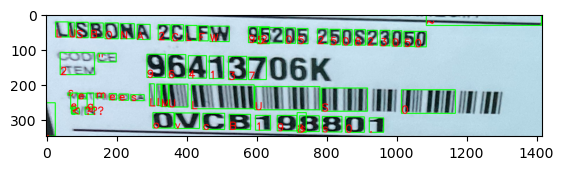

In [13]:
image = cv2.imread(r"image_100\0VCB198801.JPG")

print(callTess(image, setConfiguration(1, 3)))

drawBox(image, setConfiguration(1, 3))

<h2>Lipsia Box</h2>

“IPSIA 700/276 I75S 23050
CODICE
‘TEM I6E2607, Og
MATRICOLA Ly SLL
dled ou CF 36090 -—
SS ee ZL VOUS



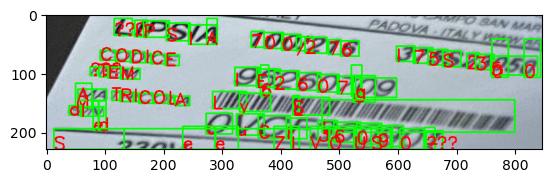

In [14]:
image = cv2.imread(r"image_100\0VCF360901.jpg")

print(callTess(image, setConfiguration(6, 3)))

drawBox(image, setConfiguration(6, 3))

<h2>Small Hussmann Box</h2>

MODEL No. KG20-5Z-4W 20H
SERINL No: 030636



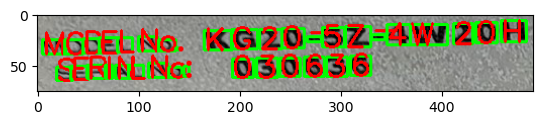

In [15]:
image = cv2.imread(r"image_100\030636.JPG")

print(callTess(image, setConfiguration(6, 3)))

drawBox(image, setConfiguration(6, 3))

<h2>Large Hussmann Box</h2>

HUSSMANN
MODEL: LAS DIMENSIONG(L"W"H\MM):  2360x1126x2090
CLIMATE CLASS: 3 TYPE:RS16
NET VOLUME(L): 1980 NET WEIGHT(KQ): 589
REFRIGERANT: = R22. DATE OF MANUFACTURE: 25/10/2022
VOLTAGE(V):220V-240V- FREQUENCY: 50
FANS CURRENT(A): 0.45 LIGHTS CURRENT(A): 0.52
ANTLOWEAT CURRENT(A): 2.51
DEFROST AND DRAIN CURRENT(A): 12.48
CONFIG ID: RLAQFZ-087 seniatno: SZ35766
ST TT
Hussmann Refrigeration (Suzhou) Co. Ltd



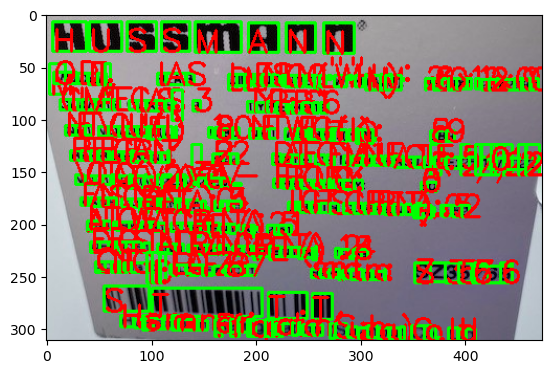

In [16]:
image = cv2.imread(r"image_100\SZ35766.jpg")

print(callTess(image, setConfiguration(6, 3)))

drawBox(image, setConfiguration(6, 3))

<h1>Loop through image_100</h1>

image_100/015965.JPG
image_100/015966.JPG


C:\Users\Elena.Justo\AppData\Local\Temp\ipykernel_11068\1194593659.py:30: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 1, 1)


image_100/027387.jpeg
image_100/027388.jpeg
image_100/029688.jpg
image_100/029689.jpg
image_100/029690.jpg
image_100/029691.jpg
image_100/030389.jpg
image_100/030390.jpg
image_100/030436.jpg
image_100/030441.jpg
image_100/030608.JPG
image_100/030609.JPG
image_100/030635.JPG
image_100/030636.JPG
image_100/031202.jpg
image_100/0UBG003001.jpg
image_100/0UBG003201.jpg
image_100/0VCB198801.JPG
image_100/0VCC452001.jpeg
image_100/0VCE338901.jpeg
image_100/0VCE339901.jpg
image_100/0VCF360001.jpg
image_100/0VCF360701.jpg
image_100/0VCF360901.jpg
image_100/0VCF455101.JPG
image_100/0VCF455201.JPG
image_100/0VCF455501.JPG
image_100/0VCG064401.JPG
image_100/0VCG064801.JPG
image_100/0VCG066701.JPG
image_100/0VCG066801.JPG
image_100/0VCG067301.jpg
image_100/0VCG093101.jpg
image_100/0VCG093201.jpg
image_100/0VCG094001.jpg
image_100/0VCG094201.jpg
image_100/0VCG133501.jpg
image_100/0VCG133601.jpg
image_100/0VCG181201.JPG
image_100/0VCG181301.JPG
image_100/0VCG181401.JPG
image_100/0VCK146201.JPG
image_

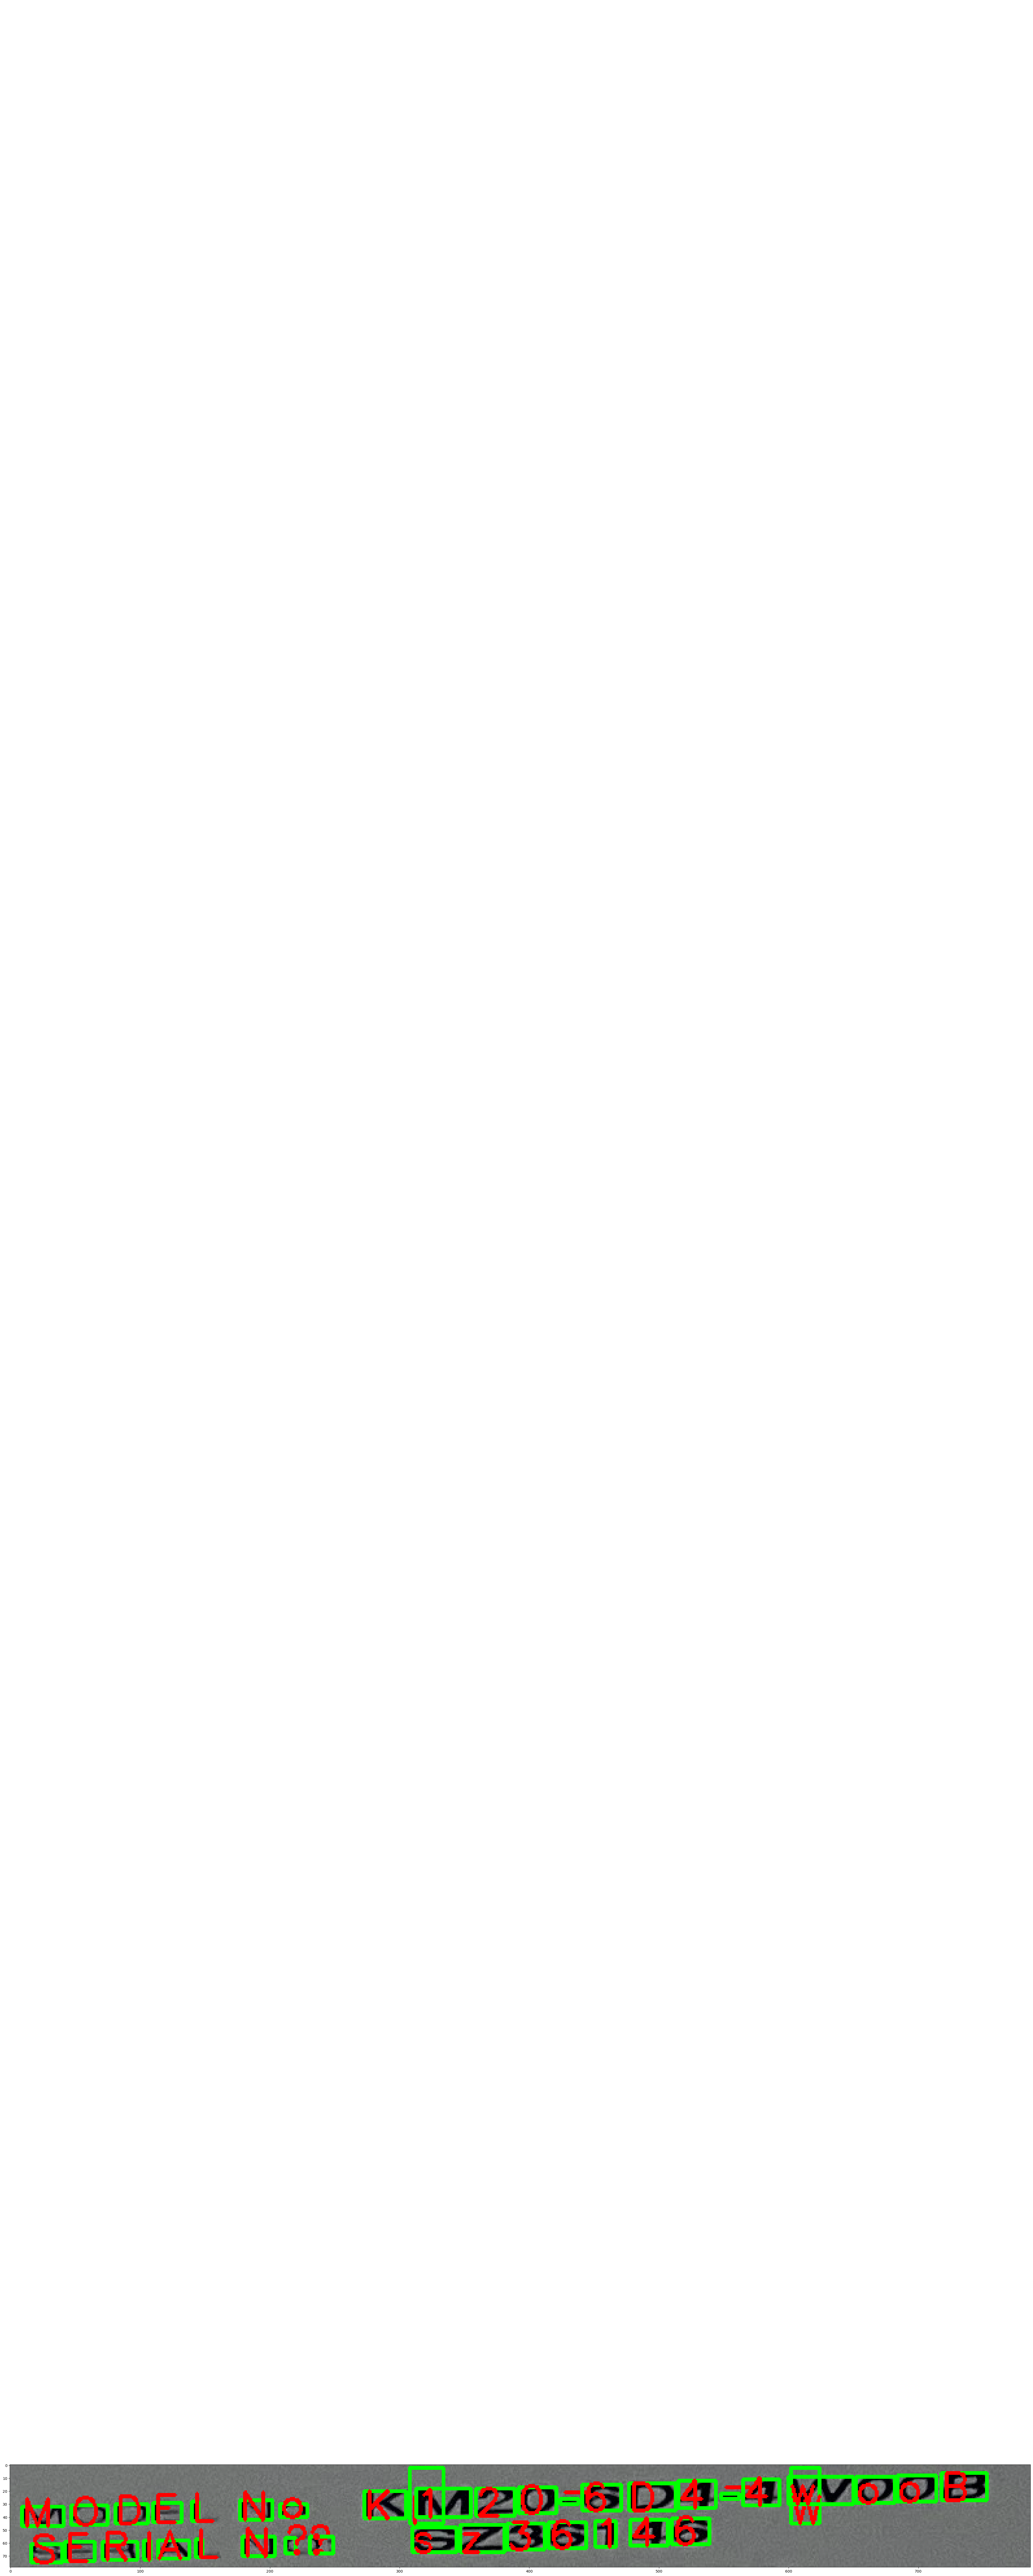

In [32]:
dir = "image_100/"
counter = 1

fig = plt.figure(figsize=(50, 400)) 
rows = len( os.listdir(dir) )
columns = 5

for image in os.listdir(dir):
    print(str(dir)+str(image))
    show = cv2.imread( str(dir)+str(image) )

    show = drawBox(show, setConfiguration(6, 3))
    
    fig.add_subplot(rows, columns, counter) 

    counter += 1

    plt.axis('off')
    #plt.imshow(show)
    plt.plot()

plt.show()
